In [95]:
import cv2
import pytesseract
import matplotlib.pyplot as plt


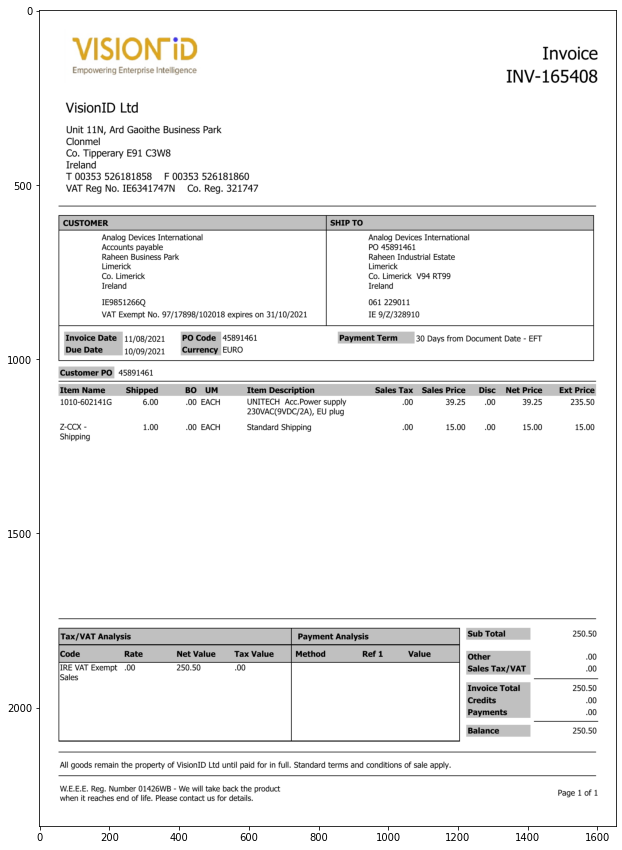

In [3]:
im = cv2.imread('/home/vimalkumar/Downloads/MicrosoftTeams-image.png')
plt.figure(figsize=(15,15))
plt.imshow(im)

In [10]:
x = (pytesseract.image_to_string(im))
print(x)

VISION iD

Empowering Enterprise Intelligence

VisionID Ltd

Unit 11N, Ard Gaoithe Business Park
Clonmel

Co. Tipperary E91 C3W8

Ireland

T 00353 526181858 F 00353 526181860
VAT Reg No. IE6341747N Co. Reg. 321747

INV-

Invoice
165408

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

CUSTOMER SHIP TO
Analog Devices International Analog Devices International
Accounts payable PO 45891461
Raheen Business Park Raheen Industrial Estate
Limerick Limerick
Co. Limerick Co. Limerick V94 RT99
Ireland Ireland
1E9851266Q 061 229011
VAT Exempt No. 97/17898/102018 expires on 31/10/2021 IE 9/Z/328910
Invoice Date 11/08/2021 PO Code 45891461 Payment Term 30 Days from Document Date - EFT
Due Date 10/09/2021 Currency EURO
Customer PO 45891461
Item Name Shipped BO UM Item Description Sales Tax Sales Price Disc Net Price Ext Price
1010-602141G 6.00 .00 EACH UNITECH Acc.Power supply .00 39.25 .00 39.25 235.50
230VAC(9VDC/2A), EU plug
Z-CCX - 1.00 .00 EACH Standard Shipping .00 15.00 -00 15.00 15.00
Ship

In [7]:
import nltk
from nltk import word_tokenize
from nltk.util import ngrams

In [14]:
token=nltk.word_tokenize(str(x))
trigrams=ngrams(token,3)

In [15]:
trigrams

In [16]:
import cv2
import pytesseract
from pytesseract import Output
import pandas as pd

image = cv2.imread('/home/vimalkumar/Downloads/MicrosoftTeams-image.png')
result = image.copy()
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Remove horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40,1))
remove_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(remove_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)

# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,40))
remove_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(remove_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(result, [c], -1, (255,255,255), 5)
#plt.figure(figsize=(15,15))
#plt.imshow(result)

#img = cv2.imread('/home/vimalkumar.s/Documents/backup/2nd page_jpeg/04152020/0430556000.jpeg')
img = cv2.resize(result, (int(result.shape[1] + (result.shape[1] * .1)),
                       int(result.shape[0] + (result.shape[0] * .25))),
                 interpolation=cv2.INTER_AREA)

img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

custom_config = r'-l eng --oem 3 --psm 6 -c tessedit_char_whitelist="ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789-:.$%./@& *"'
d = pytesseract.image_to_data(img_rgb, config=custom_config, output_type=Output.DICT)
df = pd.DataFrame(d)

df1 = df[(df.conf != '-1') & (df.text != ' ') & (df.text != '')]
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sorted_blocks = df1.groupby('block_num').first().sort_values('top').index.tolist()
for block in sorted_blocks:
    curr = df1[df1['block_num'] == block]
    sel = curr[curr.text.str.len() > 3]
    # sel = curr
    char_w = (sel.width / sel.text.str.len()).mean()
    prev_par, prev_line, prev_left = 0, 0, 0
    text = ''
    for ix, ln in curr.iterrows():
        # add new line when necessary
        if prev_par != ln['par_num']:
            text += '\n'
            prev_par = ln['par_num']
            prev_line = ln['line_num']
            prev_left = 0
        elif prev_line != ln['line_num']:
            text += '\n'
            prev_line = ln['line_num']
            prev_left = 0

        added = 0  # num of spaces that should be added
        if ln['left'] / char_w > prev_left + 1:
            added = int((ln['left']) / char_w) - prev_left
            text += ' ' * added
        text += ln['text'] + ' '
        prev_left += len(ln['text']) + added + 1
    text += '\n'
    print(text)
    
#file = open('/home/vimalkumar/Documents/File Samples/extraction/text/file.txt', 'w')
#file.write(text)
#file.close()




                               e 
       VISION                  iD                                                                                   Invoice 
       Empowering Enterprise Intelligence                                                                   INV.    165408 
      VisionID    Ltd 
      Unit 11N. Ard Gaoithe Business  Park 
      Clonmel 
      Co. Tipperary E91 C3W8 
      Ireland 
      T 00353  526181858     F 00353 526181860 
      VAT Reg  No. IE6341747N     Co. Reg. 321747 
     CUSTOMER                                                      SHIP TO 
              Analog Devices International                                  Analog Devices International 
              Accounts payable                                              PO 45891461 
              Raheen Business Park                                          Raheen Industrial Estate 
             Limerick                                                       Limerick 
              Co. Limerick     

In [58]:
token=nltk.word_tokenize(str(text))
trigrams=ngrams(token,3)
trigrams

In [59]:
x = (list(trigrams))
print(x)
new = ",".join(str(x))

[('e', 'VISION', 'iD'), ('VISION', 'iD', 'Invoice'), ('iD', 'Invoice', 'Empowering'), ('Invoice', 'Empowering', 'Enterprise'), ('Empowering', 'Enterprise', 'Intelligence'), ('Enterprise', 'Intelligence', 'INV'), ('Intelligence', 'INV', '.'), ('INV', '.', '165408'), ('.', '165408', 'VisionID'), ('165408', 'VisionID', 'Ltd'), ('VisionID', 'Ltd', 'Unit'), ('Ltd', 'Unit', '11N'), ('Unit', '11N', '.'), ('11N', '.', 'Ard'), ('.', 'Ard', 'Gaoithe'), ('Ard', 'Gaoithe', 'Business'), ('Gaoithe', 'Business', 'Park'), ('Business', 'Park', 'Clonmel'), ('Park', 'Clonmel', 'Co.'), ('Clonmel', 'Co.', 'Tipperary'), ('Co.', 'Tipperary', 'E91'), ('Tipperary', 'E91', 'C3W8'), ('E91', 'C3W8', 'Ireland'), ('C3W8', 'Ireland', 'T'), ('Ireland', 'T', '00353'), ('T', '00353', '526181858'), ('00353', '526181858', 'F'), ('526181858', 'F', '00353'), ('F', '00353', '526181860'), ('00353', '526181860', 'VAT'), ('526181860', 'VAT', 'Reg'), ('VAT', 'Reg', 'No'), ('Reg', 'No', '.'), ('No', '.', 'IE6341747N'), ('.', 'IE

In [60]:
new

"[,(,',e,',,, ,',V,I,S,I,O,N,',,, ,',i,D,',),,, ,(,',V,I,S,I,O,N,',,, ,',i,D,',,, ,',I,n,v,o,i,c,e,',),,, ,(,',i,D,',,, ,',I,n,v,o,i,c,e,',,, ,',E,m,p,o,w,e,r,i,n,g,',),,, ,(,',I,n,v,o,i,c,e,',,, ,',E,m,p,o,w,e,r,i,n,g,',,, ,',E,n,t,e,r,p,r,i,s,e,',),,, ,(,',E,m,p,o,w,e,r,i,n,g,',,, ,',E,n,t,e,r,p,r,i,s,e,',,, ,',I,n,t,e,l,l,i,g,e,n,c,e,',),,, ,(,',E,n,t,e,r,p,r,i,s,e,',,, ,',I,n,t,e,l,l,i,g,e,n,c,e,',,, ,',I,N,V,',),,, ,(,',I,n,t,e,l,l,i,g,e,n,c,e,',,, ,',I,N,V,',,, ,',.,',),,, ,(,',I,N,V,',,, ,',.,',,, ,',1,6,5,4,0,8,',),,, ,(,',.,',,, ,',1,6,5,4,0,8,',,, ,',V,i,s,i,o,n,I,D,',),,, ,(,',1,6,5,4,0,8,',,, ,',V,i,s,i,o,n,I,D,',,, ,',L,t,d,',),,, ,(,',V,i,s,i,o,n,I,D,',,, ,',L,t,d,',,, ,',U,n,i,t,',),,, ,(,',L,t,d,',,, ,',U,n,i,t,',,, ,',1,1,N,',),,, ,(,',U,n,i,t,',,, ,',1,1,N,',,, ,',.,',),,, ,(,',1,1,N,',,, ,',.,',,, ,',A,r,d,',),,, ,(,',.,',,, ,',A,r,d,',,, ,',G,a,o,i,t,h,e,',),,, ,(,',A,r,d,',,, ,',G,a,o,i,t,h,e,',,, ,',B,u,s,i,n,e,s,s,',),,, ,(,',G,a,o,i,t,h,e,',,, ,',B,u,s,i,n,e,s,s

In [64]:
val = []
for  i in x:
    #print(i)
    val.append(i[0]+i[1]+i[2])

In [65]:
val

['eVISIONiD',
 'VISIONiDInvoice',
 'iDInvoiceEmpowering',
 'InvoiceEmpoweringEnterprise',
 'EmpoweringEnterpriseIntelligence',
 'EnterpriseIntelligenceINV',
 'IntelligenceINV.',
 'INV.165408',
 '.165408VisionID',
 '165408VisionIDLtd',
 'VisionIDLtdUnit',
 'LtdUnit11N',
 'Unit11N.',
 '11N.Ard',
 '.ArdGaoithe',
 'ArdGaoitheBusiness',
 'GaoitheBusinessPark',
 'BusinessParkClonmel',
 'ParkClonmelCo.',
 'ClonmelCo.Tipperary',
 'Co.TipperaryE91',
 'TipperaryE91C3W8',
 'E91C3W8Ireland',
 'C3W8IrelandT',
 'IrelandT00353',
 'T00353526181858',
 '00353526181858F',
 '526181858F00353',
 'F00353526181860',
 '00353526181860VAT',
 '526181860VATReg',
 'VATRegNo',
 'RegNo.',
 'No.IE6341747N',
 '.IE6341747NCo.',
 'IE6341747NCo.Reg',
 'Co.Reg.',
 'Reg.321747',
 '.321747CUSTOMER',
 '321747CUSTOMERSHIP',
 'CUSTOMERSHIPTO',
 'SHIPTOAnalog',
 'TOAnalogDevices',
 'AnalogDevicesInternational',
 'DevicesInternationalAnalog',
 'InternationalAnalogDevices',
 'AnalogDevicesInternational',
 'DevicesInternationalAcco

In [69]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

/home/vimalkumar/Documents/Python_new_1/cde_venv/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [71]:
s1 = "I love GeeksforGeeks"
s2 = "I am loving GeeksforGeeks"
fuzz.ratio(s1, s2)

84

In [94]:
import re
for i in val:
    #print(i)
    ratio = fuzz.ratio(i,'InvoiceDate')
    if ratio > 60:
        #print(i)
        #print(ratio)
        r = re.findall('\d{2}/\d{2}/\d{4}',str(i))
        print(r)

[]
['11/08/2021']


In [92]:
c = 'InvoiceDate11/08/2021'
re.findall('\d{2}/\d{2}/\d{4}',str(c))

['11/08/2021']

In [105]:
#imm = cv2.imread('/home/vimalkumar/Documents/images/sample.jpg')
x = pytesseract.image_to_string('/home/vimalkumar/Downloads/0004.tif')
print(x)

The City of New York
Notice of Parking Violation

YOU MUST ANSWER WITHIN 30 DAYS OF THE DATE OF THIS
TICKET. IF YOU DO NOT RESPOND, PENALTIES AND INTEREST
WILL BE ADDED AND YOUR VEHICLE MAY BE BOOTED OR TOWED.

Rev. 08/17 RSefHol Shown
N/A=Not Applicable
Permit Displayed Permit Number Type
N/S N/A N/A
Name of the Operator, if present. If not present:
OWNER OF THE VEHICLE BEARING LICENSE

 

 

 

 

 

 

Plate CD | Exp. Date | State Plate Type
JCDI300 4 7728/21 NY PAS

Make Color Year Body Type
TAYO GY 2019 SUBN
VIN #
STDJZRFH1KS591886
THE OPERATOR AND OWNER OF THE ABOVE VEHICLE ARE CHARGED AS FOLLOWS:
In Violation of NYC Traffic Rules, Section: 4-08(h)}(1)
Failure to Dsply Parking Meter Rec
DAYS/HRS: MON-FRI/8A-7P

Place of Occurrence
Front of 4501 13th Ave

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

 

MN AN

 

VC | Meter#/Zone |Operational | Limit County | Pet.
38 |334626 K 066
Date/Time of Offense Date/Time 1st Observed
07/09/21 11:36AM N/A

Complainant’s Comments:
No Valid Rec

In [99]:
print(x)

 

cel co
coer ore eae Cer

General
ee
Aca)
md
Gain 45%
oer
age ed
PEC Y
eed
cd
Ce
eg
a)
pees)
Clarity Med
PLE

 

Ree

   



In [100]:
print(pytesseract.image_to_string(imm))

 

cel OD Co
Cory ore eget Ceo z

Cn
ee
Aca)
md
a
oer
ge ed
PEC Y
Persist 3

ed

 

PR eee

   

